# How to Build Neural Networks

# 1. Introduction to Neural Networks

## 1.1 What is a Neural Network? 

A neural network is a computational model inspired by the structure and function of biological neural networks. It consists of layers of interconnected nodes (neurons), where each connection has an associated weight. These weights are learned during training through optimization algorithms like gradient descent.

Neural networks are particularly powerful for modeling complex, non-linear relationships in data. They can be used for tasks such as classification, regression, and even generative modeling.

A typical neural network includes:
- An input layer that receives feature vectors
- One or more hidden layers with nonlinear activations
- An output layer producing predictions

# 2. Activation Functions

## 2.1 What are Activation Functions?

Activation functions introduce non-linearity into neural networks, enabling them to learn complex patterns. Without activation functions, the network would reduce to a linear model regardless of its depth.

Each activation function has different characteristics and is suited to different tasks and architectures.  

So the notebook is not cluttered with pictures when running everything the code blocks for the activation function have be commented out. For ploting the functions just uncomment and run the cell.  
Section 2.2 allows based on the input array different activation functions to be ploted in one plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Here a helper funtion is implemented that makes ploting the activation functions easier.
def plot_activation(name):
    name = name.lower()
    x = np.linspace(-10, 10, 1000)

    match name:
        case "relu":
            y = np.maximum(0, x)
        case "sigmoid":
            y = 1 / (1 + np.exp(-x))
        case "tanh":
            y = np.tanh(x)
        case _:  # default
            print(f"Activation '{name}' not recognized.")
            return

    plt.plot(x, y)
    plt.title(f"{name.capitalize()} Activation Function")
    plt.xlabel("x")
    plt.ylabel(f"{name.capitalize()}(x)")
    plt.grid(True)
    plt.show()

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from math import exp

xrange = np.arange(-5, 5, 1e-2)

# Define the full list of known activation functions
_all_activation_functions = {
    'sigmoid': (
        'Sigmoid',
        r'$S(x)=\frac{1}{1+e^{-x}}$',
        lambda x: 1 / (1 + exp(-x))
    ),
    'tanh': (
        'Tanh',
        r'$S(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$',
        lambda x: (exp(x) - exp(-x)) / (exp(x) + exp(-x))
    ),
    'relu': (
        'ReLU',
        r'$S(x)=\genfrac{\{}{}{0}{}{0 ~ if ~ x<0}{x ~ if ~ x\geq0}$',
        lambda x: x if x >= 0 else 0
    ),
    'leaky relu': (
        'Leaky ReLU',
        r'$S(x)=\genfrac{\{}{}{0}{}{0.01x ~ if ~ x<0}{x ~ if ~ x\geq0}$',
        lambda x: x if x >= 0 else 0.01 * x
    ),
}


def plot_selected_activations(selected_names):
    # Normalize input names to lowercase for matching
    selected_keys = [name.lower() for name in selected_names]

    # Filter and collect valid activations
    selected = [v for k, v in _all_activation_functions.items() if k in selected_keys]

    if not selected:
        print("No valid activation functions selected.")
        return

    rows = len(selected)
    fig = plt.figure(figsize=(10, 2 * rows))

    for row, (label, formula, func) in enumerate(selected):
        label_ax = fig.add_subplot(rows, 3, 3 * row + 1)
        label_ax.text(0, 0.5, label, fontsize=18)
        label_ax.axis('off')

        formula_ax = fig.add_subplot(rows, 3, 3 * row + 2)
        formula_ax.text(0, 0.5, formula, fontsize=18)
        formula_ax.axis('off')

        plot_ax = fig.add_subplot(rows, 3, 3 * row + 3)
        plot_ax.plot(xrange, [func(x) for x in xrange])
        plot_ax.set_title(f"{label} Function")

    plt.tight_layout()
    plt.show()

def availableActivationFunctions():
    return _all_activation_functions.keys()


### 2.1.1 ReLU (Rectified Linear Unit)

The ReLU function is defined as:  
$\text{ReLU}(x) = \max(0, x)$

It is one of the most commonly used activation functions for hidden layers due to its simplicity and effectiveness. ReLU accelerates convergence by avoiding saturation in the positive domain, but it can suffer from the "dying ReLU" problem where neurons get stuck outputting zero.

In [3]:
# plot_selected_activations(["ReLU"])

### 2.1.2 Leaky ReLU

### 2.1.3 Sigmoid

The sigmoid activation maps input values into the (0, 1) interval:

$\sigma(x) = \frac{1}{1 + e^{-x}} = {\left(1 + e^{-x} \right)}^{-1}$  

It is historically used for binary classification tasks but can lead to vanishing gradients when used in deep networks.

In [4]:
# plot_activation("sigmoid")

### 2.1.4 Tanh

The tanh activation maps inputs into the range (-1, 1):

$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$  

Like sigmoid, it can cause vanishing gradients, but it is zero-centered, which can help during optimization.


In [5]:
# plot_activation("tanh")

### 2.1.5 Softmax (good for multi-class classification)

### 2.1.6 And More

## 2.2 Compare different activation functions

In [6]:
availableActivationFunctions()

dict_keys(['sigmoid', 'tanh', 'relu', 'leaky relu'])

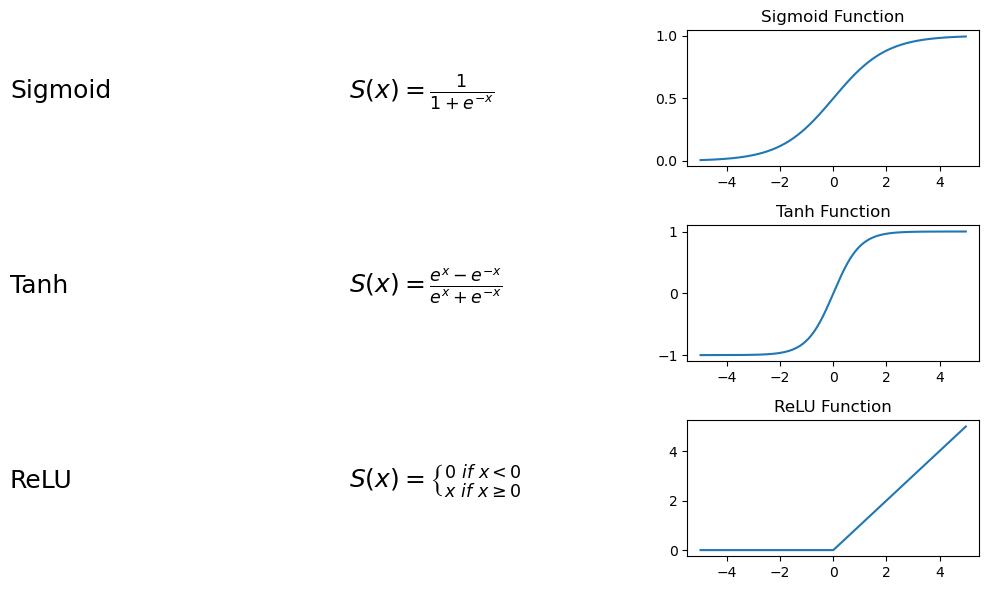

In [7]:
# Using the keys from above multiple activation functions can be ploted togheter with plot_selected_activations(["key1", "key2"])
plot_selected_activations(["ReLU", "sigmoid", "Tanh"])

# 3. Different Librarys

<div style="color:red;"><strong>TODO:</strong> Add more explanations for 3.1.2 - 3.1.6</div>

## 3.1 Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow. It provides simple, modular building blocks for constructing deep learning models.

In [17]:
from pathlib import Path
#import TF
import tensorflow as tf

### 3.1.1 Sequential Models

In this section, we'll focus on the layers that can be used with a `Sequential` model in Keras.  
The `Sequential` API in Keras provides a simple way to stack layers linearly. It's ideal for straightforward feedforward architectures where each layer has exactly one input tensor and one output tensor.

#### 3.1.1.1 The `Dense` Layer

The `Dense` layer is the most commonly used layer in neural networks and corresponds to a fully connected layer — meaning each neuron receives input from all neurons in the previous layer.

#### Key Parameters of `Dense`:

* `units`: The number of neurons in the layer. This defines the dimensionality of the output space.
* `activation`: The activation function to use (e.g., `'relu'`, `'sigmoid'`, `'tanh'`, etc.).
* `use_bias`: Whether the layer uses a bias vector.
* `kernel_initializer`: Initialization method for the weights.
* `bias_initializer`: Initialization method for the bias vector.

**Example**:

```python
from tensorflow.keras.layers import Dense

Dense(units=64, activation='relu')
```

This creates a fully connected layer with 64 neurons using the ReLU activation function.

#### 3.1.1.2 `Dropout`

A regularization layer that randomly sets a fraction of the input units to 0 during training, helping prevent overfitting.

```python
from tensorflow.keras.layers import Dropout

Dropout(0.5)  # drops 50% of input units randomly during training
```

#### 3.1.1.3 `Flatten`

Flattens the input. Useful when transitioning from convolutional layers to dense layers.

```python
from tensorflow.keras.layers import Flatten

Flatten()  # converts 2D or 3D data to 1D
```

#### 3.1.1.4 `Activation`

Can be used to specify an activation function separately (as an alternative to the `activation` argument in other layers).

```python
from tensorflow.keras.layers import Activation

Activation('relu')
```

#### 3.1.1.5 `BatchNormalization`

Normalizes the inputs to a layer for each mini-batch. Speeds up training and provides some regularization.

```python
from tensorflow.keras.layers import BatchNormalization

BatchNormalization()
```

#### 3.1.1.6 `Input`

Used to define the input shape of the model, especially in Functional API, but also useful to make input shapes explicit in `Sequential`.

```python
from tensorflow.keras.layers import Input

Input(shape=(10,))
```

### 3.1.2 Summary of Common Sequential Layers

| Layer                | Purpose                     | When to Use                                              |
| -------------------- | --------------------------- | -------------------------------------------------------- |
| `Dense`              | Fully connected computation | In almost all MLP models                                 |
| `Dropout`            | Regularization              | To reduce overfitting                                    |
| `Flatten`            | Reshape input to 1D         | Before dense layers when using convolutional layers      |
| `Activation`         | Adds activation separately  | If you want to add activations explicitly                |
| `BatchNormalization` | Normalize batch statistics  | When training deep networks or using high learning rates |
| `Input`              | Define model input shape    | As the first layer, particularly for clarity             |

### 3.1.3 Example Models

In this section, we build a simple feedforward neural network using Keras' Sequential API. This type of model stacks layers in a linear fashion, ideal for most basic classification and regression tasks.

We'll also visualize the model architecture using Keras utilities.  

* The model has:

  * An input layer with 10 features (`input_dim=10`)
  * A hidden layer with 11 neurons and the ReLU activation
  * An output layer with 1 neuron and the sigmoid activation (for binary classification)

In [12]:
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense

model = Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(units=11, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

### 3.1.4 Visualizing a model

We use `plot_model()` from `tensorflow.keras.utils` to generate an image of the model's architecture. To keep things organized, the image will be saved inside a `build/` directory, in a subfolder named after the current notebook. This way, visual outputs from different notebooks don't mix. `model.summary()` is a simple way to visualize the Model.

In [13]:
from IPython.display import Image
from keras.utils import plot_model

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           121 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

Another nice tool for more complicated models is Net2Vis: https://viscom.net2vis.uni-ulm.de/

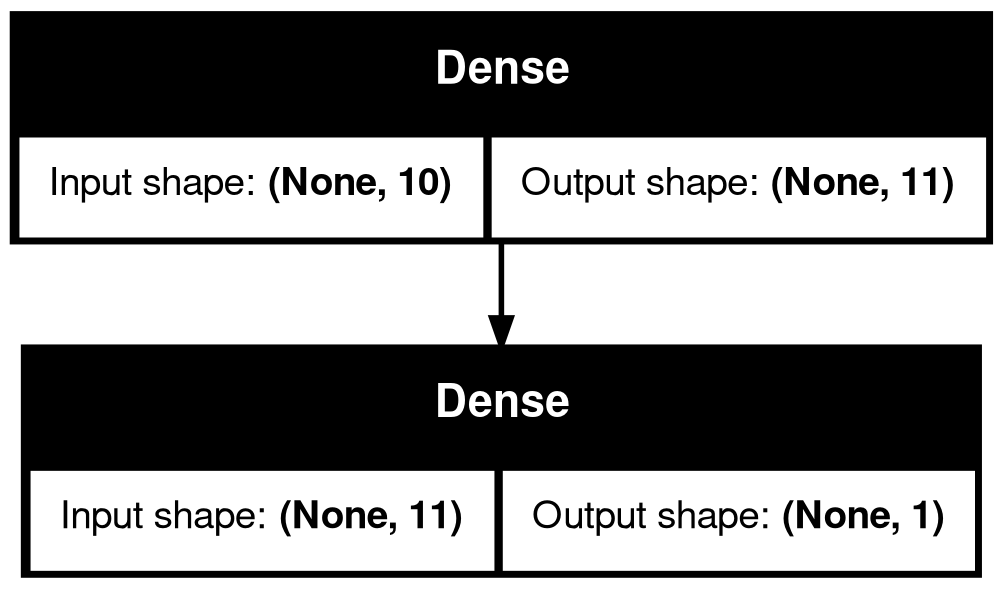

In [19]:
Path("build/BuildingNeuralNets").mkdir(parents=True, exist_ok=True)

plot_model(model, to_file='build/BuildingNeuralNets/model_plot.png', show_shapes=True, show_layer_names=False)
Image('build/BuildingNeuralNets/model_plot.png')

#### 3.1.5 Compiling the Model

Before training a model in Keras, it must be **compiled**. This step prepares the model for training by:

* Setting the **loss function**, which quantifies how far off predictions are from the actual labels.
* Configuring the **optimizer**, which determines how the model updates its weights during training.
* Defining **metrics**, which are used to evaluate model performance.

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#### **Why These Choices?**

* **`binary_crossentropy`**:
  Appropriate for binary classification tasks. It penalizes wrong predictions more heavily as the prediction deviates from the true label (0 or 1).

* **`sgd` (Stochastic Gradient Descent)**:
  A basic but powerful optimizer. You can customize it later with parameters like `learning_rate`, `momentum`, etc.

* **`accuracy`**:
  A straightforward performance metric for classification tasks, showing the proportion of correctly predicted labels.

### 3.1.6 Training the Model


Once the model is compiled, we can train it using the `.fit()` method.

This step feeds data through the model, adjusts the weights, and records performance over time.  

#### **What happens during `.fit()`?**

* The training data is passed through the model in **mini-batches**.
* The **loss** is computed and minimized using the optimizer.
* A portion of the training data is held out as **validation data** (here: `30%`), which helps monitor the model’s performance during training (without touching the test set).
* **Epochs** define how many times the model sees the full training data.
* The result is stored in a `history` object, which contains metrics per epoch.

#### **Why save the history?**

The `history` object contains all the training metrics over time. You can use this to plot curves for accuracy or loss and detect overfitting or underfitting.

In [24]:
# Get the Data like in PreparingDatin.ipynb
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the Dataset 
breast_cancer = datasets.load_breast_cancer(as_frame=True)
df = breast_cancer['frame'] 

# Select subset of features
X = df[breast_cancer.feature_names[:10]] # Use only 10 features
y = df["target"]

# Split the data for training and testing (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

additional comments: If you run the cell containing the training again, it will pick up where it stopped before. The optimizer still holds the trained weights from before, the model is not reset. If you want to really restart the training, you either need to build your model again.

In [25]:
# x_train and y_train are Numpy arrays 
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, batch_size=8)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5716 - loss: 0.6672 - val_accuracy: 0.7083 - val_loss: 0.5796
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7754 - loss: 0.5366 - val_accuracy: 0.8750 - val_loss: 0.4882
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8775 - loss: 0.4574 - val_accuracy: 0.9000 - val_loss: 0.4261
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.4086 - val_accuracy: 0.9083 - val_loss: 0.3807
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9041 - loss: 0.3576 - val_accuracy: 0.9250 - val_loss: 0.3453
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9111 - loss: 0.3341 - val_accuracy: 0.9250 - val_loss: 0.3175
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8820 - loss: 0.3224 - val_accuracy: 0.9250 - val_loss: 0.2942
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9017 - loss: 0.3162 - val_accuracy: 0.9333 - 

In [26]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


We can now plot the loss evolution over the training epochs for the training and validation dataset:  

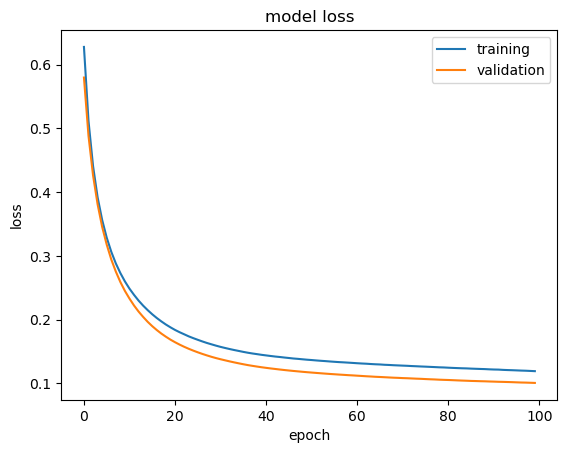

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Further Methods of Evaluation of the the model after training and of the predictions can be seen in EvaluatePredictions.ipynb 

In [28]:
print('Testing...')
y_pred = model.predict(X_test, verbose = True, batch_size=8)

Testing...
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Plot the output prediction for malignant and benign breast cancer showing the separation between these two classes.

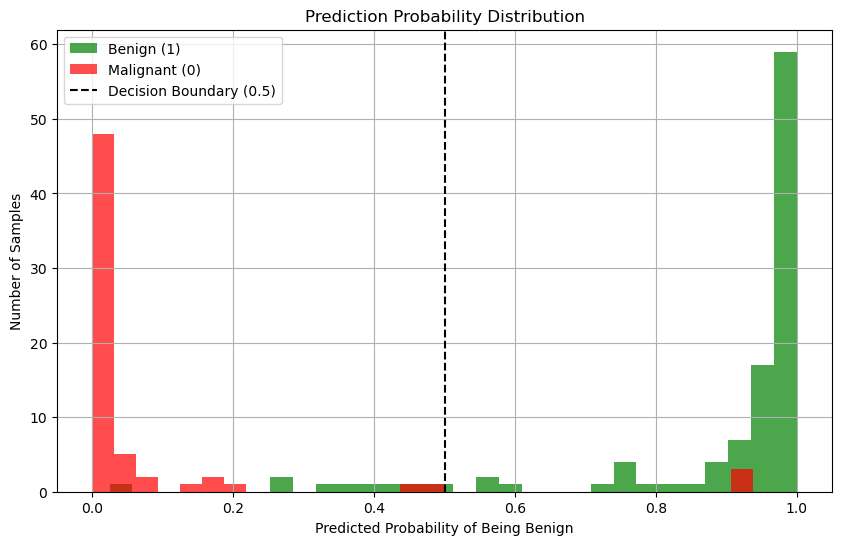

In [29]:
malignant_pred = y_pred[y_test == 0]
benign_pred = y_pred[y_test == 1]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(benign_pred, bins=30, alpha=0.7, label='Benign (1)', color='green')
plt.hist(malignant_pred, bins=30, alpha=0.7, label='Malignant (0)', color='red')
plt.axvline(0.5, color='black', linestyle='--', label='Decision Boundary (0.5)')
plt.xlabel('Predicted Probability of Being Benign')
plt.ylabel('Number of Samples')
plt.title('Prediction Probability Distribution')
plt.legend()
plt.grid(True)
plt.show()

How do we decide now to which class the test example needs to assigned based on our prediction? Intuitively, we could simply convert our predictions into classes by using a threshold of 0.5 . Further Information can be viewed in the EvaluatePredictions.ipynb.